In [3]:
import pandas as pd 

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../data/선택된피처/dataset1_general_raw.csv', encoding='CP949')
df.drop(columns='Unnamed: 0', inplace=True)
df 

,회사명,거래소코드,회계년도,상장일,상장폐지일_x,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,매출액증가율,종업원수증가율,매출액정상영업이익률,총자본정상영업이익률,자기자본정상영업이익률,금융비용부담률,수지비율,자기자본구성비율,CASH FLOW 대 총자본비율,총자본투자효율,순운전자본회전률
0,(주)CMG제약,58820,201112,200108,NaN,0,0,0,제조업,1,13.166482,56.396905,4.65,3.61,2.37,3.51,0.80,108.35,66.046945,-15.65,12.72,0.86
1,(주)CMG제약,58820,201212,200108,NaN,0,0,0,제조업,1,109.147119,-8.429134,-0.74,-25.87,-9.96,-16.95,2.53,140.55,55.317408,-3.62,0.47,0.42
2,(주)CMG제약,58820,201312,200108,NaN,0,0,0,제조업,1,-2.093352,25.510008,1.49,3.88,1.40,1.96,1.65,98.55,87.631971,-4.93,12.51,0.42
3,(주)CMG제약,58820,201412,200108,NaN,0,0,0,제조업,1,3.855597,11.520576,20.59,1.94,0.78,0.90,-0.65,99.32,84.387905,-2.77,12.16,0.56
4,(주)CMG제약,58820,201512,200108,NaN,0,0,0,제조업,1,-2.644307,18.851969,-4.88,-9.51,-4.49,-5.37,-0.11,113.24,82.795953,2.77,7.63,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,흥아해운(주),3280,201312,197606,NaN,0,0,0,운수 및 창고업,0,7.026008,5.977506,-3.78,2.51,3.50,13.80,1.84,95.90,27.203257,4.71,14.13,2.02
12739,흥아해운(주),3280,201412,197606,NaN,0,0,0,운수 및 창고업,0,13.690307,7.171915,9.90,2.25,3.04,11.51,1.66,97.18,25.784426,2.10,13.89,2.03
12740,흥아해운(주),3280,201512,197606,NaN,0,0,0,운수 및 창고업,0,21.933460,2.420227,7.68,2.51,2.95,12.48,2.22,98.11,21.863026,2.17,13.11,2.15
12741,흥아해운(주),3280,201612,197606,NaN,0,0,0,운수 및 창고업,0,21.081715,-1.581947,15.87,0.71,0.67,3.23,3.21,100.55,20.081457,1.70,10.98,2.19


### 독립변수 및 종속변수 컬럼 지정

In [5]:
data = df.iloc[:, 10:]
target = df.iloc[:, 7]

## 데이터 랜덤 분할

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
          총자본증가율     매출액증가율  종업원수증가율  매출액정상영업이익률  총자본정상영업이익률  자기자본정상영업이익률  \
4015    1.516375   5.771085    -4.28        5.36        6.92        17.30   
10105  -9.093296  34.320647   -14.29        4.96        1.65         4.19   
7132   -4.750046  -6.812388     1.93        1.31        1.50         7.18   
8291   13.299888  15.843847    -4.85        6.67        5.58         8.76   
5389    3.817423 -21.654575     9.29       -9.87       -7.18       -13.61   
...          ...        ...      ...         ...         ...          ...   
8134   -0.103645   6.111905    -5.08        3.30        2.28         2.65   
4989  -18.246642 -38.672061   -14.75      -19.10      -15.57       -18.01   
6962   50.752395  18.868034    -6.70        6.88        5.85        14.08   
2448   14.626300  -0.843661    -1.37        2.71        3.63         5.97   
474    19.033482   8.581736    10.81       19.03       14.21        16.84   

       금융비용부담률    수지비율   자기자본구성비율  CASH FLOW 대 총자본비율  총자본투자효율  

In [7]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(8920, 12), 테스트 세트 Shape:(3823, 12)
 학습 세트 레이블 값 분포 비율
0    0.941368
1    0.058632
Name: 부실기업, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.402354
1    0.026233
Name: 부실기업, dtype: float64


In [8]:
from imblearn.combine import SMOTETomek


smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print('nearmiss 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('nearmiss 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_smt.shape, y_train_smt.shape)


print('\n nearmiss 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('\n nearmiss 적용 후 레이블 값 분포: \n', pd.Series(y_train_smt).value_counts())

nearmiss 적용 전 학습용 피처/레이블 데이터 세트:  (8920, 12) (8920,)
nearmiss 적용 후 학습용 피처/레이블 데이터 세트:  (16758, 12) (16758,)

 nearmiss 적용 전 레이블 값 분포: 
 0    8397
1     523
Name: 부실기업, dtype: int64

 nearmiss 적용 후 레이블 값 분포: 
 0    8379
1    8379
Name: 부실기업, dtype: int64


## SMOTETomek 데이터 랜덤 분할

In [105]:
smt = SMOTETomek(random_state=42)

X_smt, y_smt = smt.fit_resample(data, target)

In [110]:
df_smt = pd.concat([pd.DataFrame(X_smt), pd.DataFrame(y_smt)], axis=1)
df_smt

,총자본증가율,매출액증가율,종업원수증가율,매출액정상영업이익률,총자본정상영업이익률,자기자본정상영업이익률,금융비용부담률,수지비율,자기자본구성비율,CASH FLOW 대 총자본비율,총자본투자효율,순운전자본회전률,부실기업
0,13.166482,56.396905,4.650000,3.610000,2.370000,3.510000,0.800000,108.350000,66.046945,-15.650000,12.720000,0.860000,0
1,109.147119,-8.429134,-0.740000,-25.870000,-9.960000,-16.950000,2.530000,140.550000,55.317408,-3.620000,0.470000,0.420000,0
2,-2.093352,25.510008,1.490000,3.880000,1.400000,1.960000,1.650000,98.550000,87.631971,-4.930000,12.510000,0.420000,0
3,3.855597,11.520576,20.590000,1.940000,0.780000,0.900000,-0.650000,99.320000,84.387905,-2.770000,12.160000,0.560000,0
4,-2.644307,18.851969,-4.880000,-9.510000,-4.490000,-5.370000,-0.110000,113.240000,82.795953,2.770000,7.630000,0.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23929,-32.399089,-62.841881,-20.855852,-11.544875,-3.120776,-7.185519,10.171368,148.584099,48.555904,1.305792,-4.674718,0.315040,1
23930,-2.223051,-4.561834,1.633436,-5.825572,-3.552069,-10.964212,3.117130,113.389512,30.128331,4.937565,10.357015,0.928183,1
23931,12.183866,-35.464592,7.484220,1.556584,1.244321,1.551728,-0.772634,96.476316,80.830148,9.179238,16.166751,0.965535,1
23932,4.781648,0.276113,-6.020347,0.610553,0.156033,0.249011,2.201362,100.448698,55.317102,6.377639,15.356335,0.749297,1


In [112]:
df_smt['부실기업'].value_counts()

0    11967
1    11967
Name: 부실기업, dtype: int64

In [135]:
data_smt = df_smt.iloc[:, :10]
target_smt = df_smt.iloc[:, -1]

In [136]:
from sklearn.model_selection import train_test_split

X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(data_smt, target_smt, test_size=0.3, random_state=42)

print('X 테스트 데이터 :')
print(X_test_smt)
print('y 테스트 데이터 :')
print(list(y_test_smt))

X 테스트 데이터 :
          총자본증가율     매출액증가율    종업원수증가율  매출액정상영업이익률  총자본정상영업이익률  자기자본정상영업이익률  \
423     3.100507  27.137996   3.950000   19.540000   14.170000    16.270000   
13523 -34.428053 -65.410035 -10.591114  -30.776637  -10.034178   -68.645113   
15041  -2.030065 -10.346451  -8.194391   -7.142585   -2.444002    -2.704312   
1510   14.261279   2.924420  20.990000   36.620000   15.980000    20.410000   
16506  -2.549243   7.475297 -24.588122   -0.230291   -0.420469    -0.696277   
...          ...        ...        ...         ...         ...          ...   
16409  -6.487864  24.007311  -2.870898    0.524551    0.773273     2.177644   
6162    3.606662   1.097452   0.000000    1.920000    1.940000     4.370000   
14564  -4.444994   9.175945   1.486583    0.534781    0.371135     0.725873   
17711  17.631084   8.382649   2.475178    1.092887    0.890919     2.558196   
7547   -5.438308   2.291517   3.580000    9.880000    8.000000    15.500000   

         금융비용부담률        수지비율   자기자본구성비율

In [137]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train_smt.count()
test_cnt = y_test_smt.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train_smt.shape, X_test_smt.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train_smt.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test_smt.value_counts()/train_cnt)

학습 세트 Shape:(16753, 10), 테스트 세트 Shape:(7181, 10)
 학습 세트 레이블 값 분포 비율
0    0.50188
1    0.49812
Name: 부실기업, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.21620
0    0.21244
Name: 부실기업, dtype: float64


In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, roc_auc_score, recall_score, \
    precision_score, confusion_matrix

In [139]:
def plot_roc_curve(y_train_smt, y_test, train_pred, test_pred, train_prob, test_prob):
    
    fpr, tpr, thresholds = roc_curve(y_test, test_prob) # output 3개가 나오는데, 각 threshhold 마다의 fpr, tpr값 인듯
    
    train_roc_auc = roc_auc_score(y_train_smt, train_pred)
    test_roc_auc = roc_auc_score(y_test, test_pred)
    
    train_f1 = f1_score(y_train_smt, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    train_recall = recall_score(y_train_smt, train_pred)
    test_recall = recall_score(y_test, test_pred)
    
    train_pre = precision_score(y_train_smt, train_pred)
    test_pre = precision_score(y_test, test_pred)  
    
    train_acc = accuracy_score(y_train_smt, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('test ROC : {}'.format(round(roc_auc_score(y_test, test_prob),3)),fontsize=16)
    plt.legend()
    plt.show()
    
    print('train_roc_auc score: ',train_roc_auc)
    print('test_roc_auc score: ',test_roc_auc,'\n')
    
    print('train_f1 score: ',train_f1)
    print('test_f1 score: ',test_f1,'\n')
    
    print('train_recall score: ',train_recall)
    print('test_recall score: ',test_recall,'\n')

    print('train_pre score: ',train_pre)
    print('test_pre score: ',test_pre,'\n')
    
    print('train acc score: ',train_acc)
    print('test acc score: ',test_acc, '\n')

## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
import time
import warnings
warnings.filterwarnings('ignore')

lr_reg_time = time.time()

lr_reg = LogisticRegression()
lr_reg_model = lr_reg.fit(X_train_smt, y_train_smt)
lr_pred = lr_reg_model.predict(X_test_smt)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test_smt, lr_pred)))
print('LogisticRegression roc_auc: {:0.3f}'.format(roc_auc_score(y_test_smt, lr_pred)))
print('LogisticRegression 수행 시간: {0:.1f} 초'.format(time.time()-lr_reg_time))


LogisticRegression 정확도: 0.8311
LogisticRegression roc_auc: 0.831
LogisticRegression 수행 시간: 0.1 초


## LR GridSearch CV

In [143]:
# LogisticRegression GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\
            'C':[0.01, 0.1, 1, 5, 10],\
            'solver':['lbfgs', 'liblinear']}

def best_lrparam(clf, param, scoring_name, cv_num):
    b_params= []
    
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
    grid_cv.fit(X_train_smt, y_train_smt)
    
    b_params.append(grid_cv.best_params_)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_est = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    predictions = best_est.predict(X_test_smt)
    accuracy = accuracy_score(y_test_smt, predictions)
    print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
    
    return b_params

In [144]:
b_params = best_lrparam(lr_reg, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

GridSearchCV 최고 정확도 :0.8396
테스트 세트에서의 LogisticRegression 정확도 : 0.8304


{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [145]:
# 최적 하이퍼 파라미터 저장
penalty = ''
C = 0
solver = ''

for key, value in b_params[-1].items():
    if key == 'penalty':
        penalty = value
    if key == 'C':
        C = value
    else:
        solver = value

In [146]:
# 최적 하이퍼 파라미터 적용
lr_reg1 = LogisticRegression(penalty=penalty, C=C, solver=solver)
lr_reg1.fit(X_train_smt, y_train_smt)
lr1_pred = lr_reg1.predict(X_test_smt)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test_smt, lr1_pred)))

예측 정확도: 0.8304


In [147]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test_smt, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test_smt, pred)
    accuracy = accuracy_score(y_test_smt, pred)
    precision = precision_score(y_test_smt, pred)
    recall = recall_score(y_test_smt, pred)
    f1 = f1_score(y_test_smt, pred)
    roc_auc = roc_auc_score(y_test_smt, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [150]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test_smt, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test_smt, custom_predict, lr_reg1.predict_proba(X_test_smt)[:, 1])

In [155]:
from sklearn.preprocessing import Binarizer

thresholds = [0.25, 0.3, 0.4, 0.5, 0.55]
pred_proba = lr_reg1.predict_proba(X_test_smt)

get_eval_by_threshold(y_test_smt, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.25
오차행렬
[[1591 1968]
 [ 221 3401]]
정확도: 0.6952, 정밀도: 0.6335, 재현율: 0.9390, F1:0.7565, AUC:0.8708
임곗값: 0.3
오차행렬
[[1942 1617]
 [ 263 3359]]
정확도: 0.7382, 정밀도: 0.6750, 재현율: 0.9274, F1:0.7813, AUC:0.8708
임곗값: 0.4
오차행렬
[[2544 1015]
 [ 398 3224]]
정확도: 0.8032, 정밀도: 0.7606, 재현율: 0.8901, F1:0.8203, AUC:0.8708
임곗값: 0.5
오차행렬
[[2981  578]
 [ 640 2982]]
정확도: 0.8304, 정밀도: 0.8376, 재현율: 0.8233, F1:0.8304, AUC:0.8708
임곗값: 0.55
오차행렬
[[3121  438]
 [ 934 2688]]
정확도: 0.8089, 정밀도: 0.8599, 재현율: 0.7421, F1:0.7967, AUC:0.8708


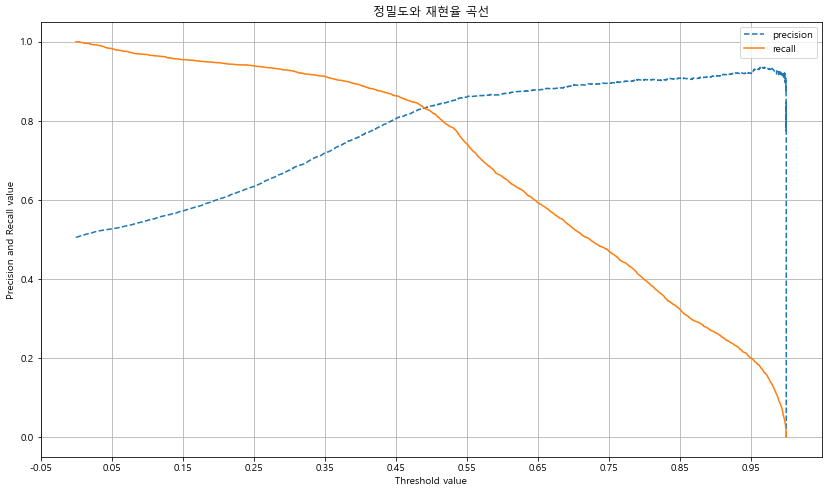

In [154]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"

def precision_recall_curve_plot(y_test_smt, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test_smt, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test_smt, lr_reg1.predict_proba(X_test_smt)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [157]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lr_reg1.predict_proba(X_test_smt)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test_smt, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1922 1923 1924]
샘플 index로 추출한 임곗값:  [1. 1. 1. ... 0. 0. 0.]
샘플 임곗값별 FPR:  [0.    0.001 0.001 ... 0.995 0.995 1.   ]
샘플 임곗값별 TPR:  [0.    0.    0.003 ... 1.    1.    1.   ]


In [158]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_reg1.predict_proba(X_test_smt)[:, 1]
roc_score = roc_auc_score(y_test_smt, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8708


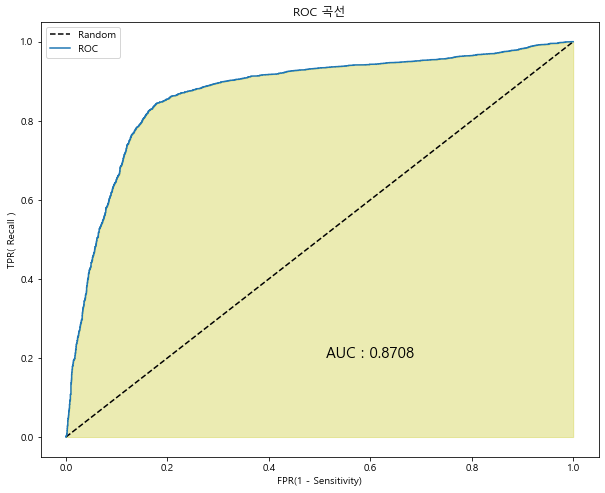

In [159]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## Decision Tree

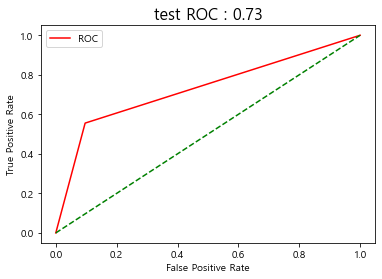

train_roc_auc score:  1.0
test_roc_auc score:  0.7295749357605028 

train_f1 score:  1.0
test_f1 score:  0.36619718309859156 

train_recall score:  1.0
test_recall score:  0.5555555555555556 

train_pre score:  1.0
test_pre score:  0.27310924369747897 

train acc score:  1.0
test acc score:  0.8822913941930421 



In [27]:
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()

dt_clf = DecisionTreeClassifier(random_state=42)

trained_model = dt_clf.fit(X_train_smt, y_train_smt)
train_pred = trained_model.predict(X_train_smt)
train_prob = trained_model.predict_proba(X_train_smt)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_smt, y_test, train_pred, test_pred, train_prob, test_prob)

## DT GridSearch CV

In [28]:
# DecisionTreeClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 4, 5, 6],\
            'min_samples_split':[2, 3, 4, 5, 6],\
            'min_samples_leaf':[1, 5, 6, 7, 8]}

def best_dtparam(clf, param, scoring_name, cv_num):
    start_time = time.time()
    b_params= []
    
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
    grid_cv.fit(X_train_smt, y_train_smt)
    
    b_params.append(grid_cv.best_params_)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_est = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    predictions = best_est.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
    print('DecisionTreeClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))
    
    return b_params

In [29]:
b_params = best_dtparam(dt_clf, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

GridSearchCV 최고 정확도 :0.8863
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8478
DecisionTreeClassifier GridSearchCV 수행 시간: 42.5 초


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [30]:
# 최적 하이퍼 파라미터 저장

max_depth = 0
min_samples_leaf = 0
min_samples_split = 0

for key, value in b_params[-1].items():
    if key == 'max_depth':
        max_depth = value
    if key == 'min_samples_leaf':
        min_samples_leaf = value
    else:
        min_samples_split = value

In [31]:
# 최적 하이퍼 파라미터 적용
dt_clf1 = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
dt_clf1.fit(X_train_smt, y_train_smt)
dt1_pred = dt_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, dt1_pred)))

예측 정확도: 0.8478


In [32]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [33]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, dt_clf1.predict_proba(X_test)[:, 1])

In [37]:
from sklearn.preprocessing import Binarizer

thresholds = [0.6, 0.7, 0.8, 0.85, 0.9]
pred_proba = dt_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.6
오차행렬
[[3060  529]
 [  40  194]]
정확도: 0.8512, 정밀도: 0.2683, 재현율: 0.8291, F1:0.4054, AUC:0.8861
임곗값: 0.7
오차행렬
[[3109  480]
 [  52  182]]
정확도: 0.8608, 정밀도: 0.2749, 재현율: 0.7778, F1:0.4062, AUC:0.8861
임곗값: 0.8
오차행렬
[[3269  320]
 [ 109  125]]
정확도: 0.8878, 정밀도: 0.2809, 재현율: 0.5342, F1:0.3682, AUC:0.8861
임곗값: 0.85
오차행렬
[[3287  302]
 [ 121  113]]
정확도: 0.8894, 정밀도: 0.2723, 재현율: 0.4829, F1:0.3482, AUC:0.8861
임곗값: 0.9
오차행렬
[[3430  159]
 [ 149   85]]
정확도: 0.9194, 정밀도: 0.3484, 재현율: 0.3632, F1:0.3556, AUC:0.8861


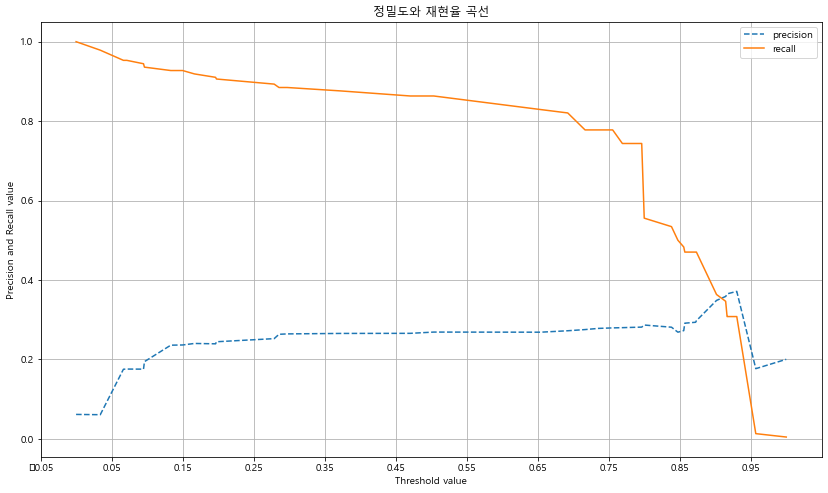

In [35]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dt_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [38]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = dt_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
샘플 index로 추출한 임곗값:  [1.   0.96 0.93 0.92 0.92 0.91 0.9  0.87 0.87 0.86 0.86 0.85 0.84 0.8
 0.8  0.78 0.77 0.76 0.74 0.72 0.69 0.65 0.5  0.47 0.37 0.3  0.29 0.28
 0.2  0.2  0.17 0.15 0.13 0.1  0.09 0.07 0.07 0.03 0.  ]
샘플 임곗값별 FPR:  [0.001 0.004 0.034 0.035 0.035 0.04  0.044 0.072 0.074 0.075 0.084 0.089
 0.089 0.09  0.124 0.125 0.125 0.131 0.132 0.134 0.143 0.147 0.153 0.156
 0.158 0.161 0.162 0.173 0.183 0.189 0.19  0.196 0.196 0.253 0.29  0.292
 0.293 0.991 1.   ]
샘플 임곗값별 TPR:  [0.004 0.013 0.308 0.308 0.308 0.346 0.363 0.47  0.47  0.47  0.483 0.5
 0.534 0.556 0.744 0.744 0.744 0.778 0.778 0.778 0.821 0.829 0.863 0.863
 0.876 0.885 0.885 0.893 0.906 0.91  0.919 0.927 0.927 0.936 0.944 0.953
 0.953 0.979 1.   ]


In [39]:
from sklearn.metrics import roc_auc_score

pred_proba = dt_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8861


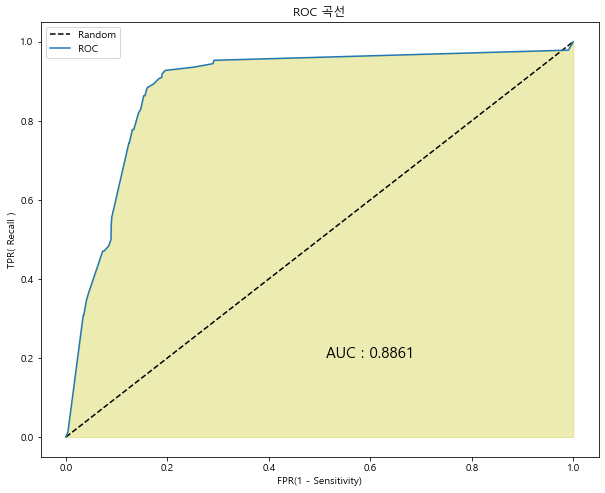

In [40]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## Random Forest

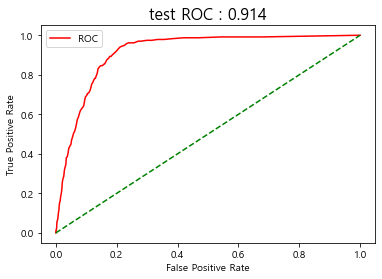

train_roc_auc score:  1.0
test_roc_auc score:  0.795256993710602 

train_f1 score:  1.0
test_f1 score:  0.4322147651006712 

train_recall score:  1.0
test_recall score:  0.688034188034188 

train_pre score:  1.0
test_pre score:  0.3150684931506849 

train acc score:  1.0
test acc score:  0.8893539105414596 



In [41]:
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
rf_clf_time = time.time()

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

trained_model = rf_clf.fit(X_train_smt, y_train_smt)

train_pred = trained_model.predict(X_train_smt)
train_prob = trained_model.predict_proba(X_train_smt)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_smt, y_test, train_pred, test_pred, train_prob, test_prob)

## RF GridSearch CV

In [42]:
# RandomForestClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100],\
        'max_depth' : [8, 10, 12],\
        'min_samples_leaf' : [8, 10, 12, 16, 20],\
        'min_samples_split' : [4, 6, 8, 10]
        }

def best_rfparam(clf, param, scoring_name, cv_num):
        start_time = time.time()
        b_params= []

        grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
        grid_cv.fit(X_train_smt, y_train_smt)

        b_params.append(grid_cv.best_params_)

        print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
        print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
        best_est = grid_cv.best_estimator_

        # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
        predictions = best_est.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))
        print('RandomForestClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

        return b_params

In [43]:
b_params = best_rfparam(rf_clf, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 100}

GridSearchCV 최고 정확도 :0.9093
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8622
RandomForestClassifier GridSearchCV 수행 시간: 236.5 초


{'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 100}

In [44]:
# 최적 하이퍼 파라미터 저장

max_depth = 0
min_samples_leaf = 0
min_samples_split = 0
n_estimators = 0

for key, value in b_params[-1].items():
    if key == 'max_depth':
        max_depth = value
    if key == 'min_samples_leaf':
        min_samples_leaf = value
    elif key == 'min_samples_split':
        min_samples_split = value
    else:
        n_estimators = value

In [45]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators)
rf_clf1.fit(X_train_smt, y_train_smt)
rf1_pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, rf1_pred)))

예측 정확도: 0.8648


In [46]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [47]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, dt_clf1.predict_proba(X_test)[:, 1])

In [50]:
from sklearn.preprocessing import Binarizer

thresholds = [0.65, 0.7, 0.75, 0.8, 0.85]
pred_proba = rf_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.65
오차행렬
[[3270  319]
 [  75  159]]
정확도: 0.8969, 정밀도: 0.3326, 재현율: 0.6795, F1:0.4466, AUC:0.8861
임곗값: 0.7
오차행렬
[[3327  262]
 [  88  146]]
정확도: 0.9084, 정밀도: 0.3578, 재현율: 0.6239, F1:0.4548, AUC:0.8861
임곗값: 0.75
오차행렬
[[3394  195]
 [ 111  123]]
정확도: 0.9200, 정밀도: 0.3868, 재현율: 0.5256, F1:0.4457, AUC:0.8861
임곗값: 0.8
오차행렬
[[3452  137]
 [ 135   99]]
정확도: 0.9289, 정밀도: 0.4195, 재현율: 0.4231, F1:0.4213, AUC:0.8861
임곗값: 0.85
오차행렬
[[3503   86]
 [ 172   62]]
정확도: 0.9325, 정밀도: 0.4189, 재현율: 0.2650, F1:0.3246, AUC:0.8861


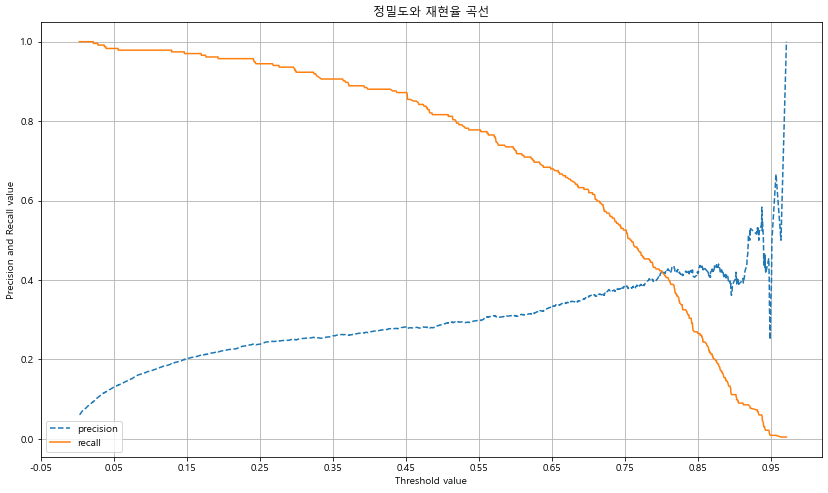

In [49]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, rf_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [51]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

In [52]:
from sklearn.metrics import roc_auc_score

pred_proba = rf_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.9220


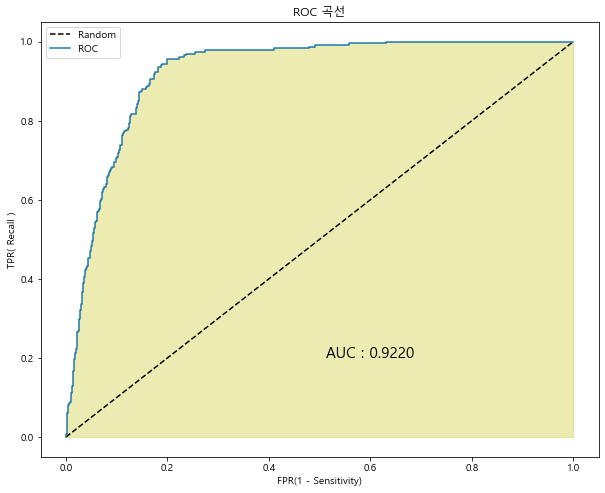

In [53]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## GB Classifier

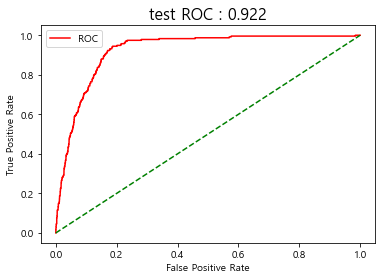

train_roc_auc score:  0.8995106814655687
test_roc_auc score:  0.8635008918514073 

train_f1 score:  0.9038812785388128
test_f1 score:  0.4209445585215606 

train_recall score:  0.9449815013724788
test_recall score:  0.8760683760683761 

train_pre score:  0.8662071983371622
test_pre score:  0.27702702702702703 

train acc score:  0.8995106814655687
test acc score:  0.8524718807219461 



In [55]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GradientBoostingClassifier 학습/예측/평가
gb_clf_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)

trained_model = gb_clf.fit(X_train_smt, y_train_smt)

train_pred = trained_model.predict(X_train_smt)
train_prob = trained_model.predict_proba(X_train_smt)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_smt, y_test, train_pred, test_pred, train_prob, test_prob)

## GBClassifier GridSearch CV

In [56]:
# GBClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
        'learning_rate':[0.1],\
        'n_estimators':[100],\
        'max_depth' : [3, 5, 8, 10],\
        'min_samples_leaf' : [6, 8, 10],\
        'min_samples_split' : [4, 6, 8]
        }

def best_gbcparam(clf, param, scoring_name, cv_num):
        start_time = time.time()
        b_params= []        
        grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
        grid_cv.fit(X_train_smt, y_train_smt)
        
        b_params.append(grid_cv.best_params_)
        
        print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
        print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
        best_est = grid_cv.best_estimator_
        
        # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
        predictions = best_est.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print('테스트 세트에서의 GBClassifier 정확도 : {0:.4f}'.format(accuracy))
        print('GBClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))
        
        return b_params

In [57]:
b_params = best_gbcparam(gb_clf, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 100}

GridSearchCV 최고 정확도 :0.9409
테스트 세트에서의 GBClassifier 정확도 : 0.8901
GBClassifier GridSearchCV 수행 시간: 1644.7 초


{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 100}

In [58]:
# 최적 하이퍼 파라미터 저장

learning_rate = 0
max_depth = 0
min_samples_leaf = 0
min_samples_split = 0
n_estimators = 0

for key, value in b_params[-1].items():
    if key == 'max_depth':
        max_depth = value
    if key == 'min_samples_leaf':
        min_samples_leaf = value
    elif key == 'min_samples_split':
        min_samples_split = value
    elif key == 'learning_rate':
        learning_rate = value
    elif key == 'n_estimators':
        n_estimators = value
    else:
        n_estimators = value

In [59]:
# 최적 하이퍼 파라미터 적용
gb_clf1 = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators)
gb_clf1.fit(X_train_smt, y_train_smt)
gb1_pred = gb_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, gb1_pred)))

예측 정확도: 0.8925


In [60]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [61]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, gb_clf1.predict_proba(X_test)[:, 1])

In [66]:
from sklearn.preprocessing import Binarizer

thresholds = [0.4, 0.45, 0.55, 0.75, 0.8, 0.85]
pred_proba = gb_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차행렬
[[3222  367]
 [  75  159]]
정확도: 0.8844, 정밀도: 0.3023, 재현율: 0.6795, F1:0.4184, AUC:0.9078
임곗값: 0.45
오차행렬
[[3244  345]
 [  80  154]]
정확도: 0.8888, 정밀도: 0.3086, 재현율: 0.6581, F1:0.4202, AUC:0.9078
임곗값: 0.55
오차행렬
[[3293  296]
 [  97  137]]
정확도: 0.8972, 정밀도: 0.3164, 재현율: 0.5855, F1:0.4108, AUC:0.9078
임곗값: 0.75
오차행렬
[[3392  197]
 [ 135   99]]
정확도: 0.9132, 정밀도: 0.3345, 재현율: 0.4231, F1:0.3736, AUC:0.9078
임곗값: 0.8
오차행렬
[[3418  171]
 [ 141   93]]
정확도: 0.9184, 정밀도: 0.3523, 재현율: 0.3974, F1:0.3735, AUC:0.9078
임곗값: 0.85
오차행렬
[[3455  134]
 [ 156   78]]
정확도: 0.9241, 정밀도: 0.3679, 재현율: 0.3333, F1:0.3498, AUC:0.9078


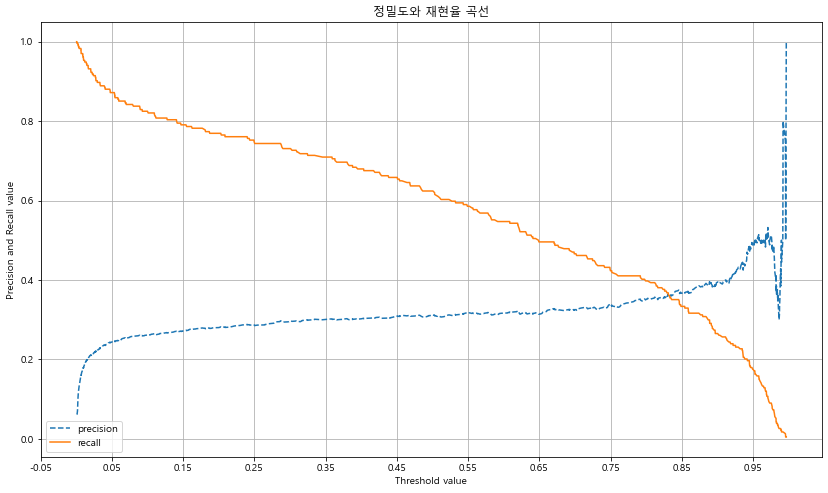

In [63]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, gb_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [67]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = gb_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

In [68]:
from sklearn.metrics import roc_auc_score

pred_proba = gb_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.9078


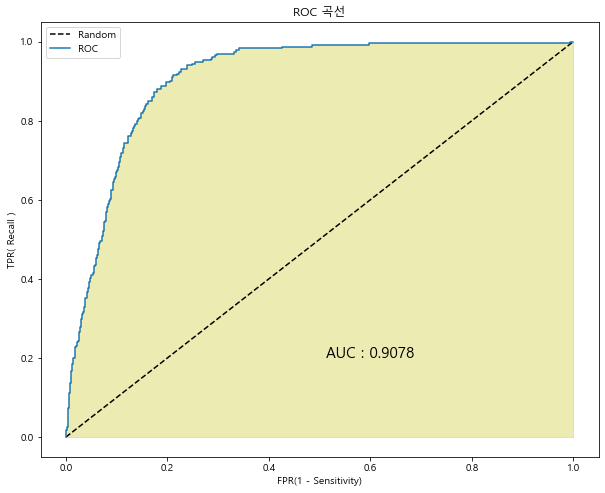

In [69]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## LightGBM

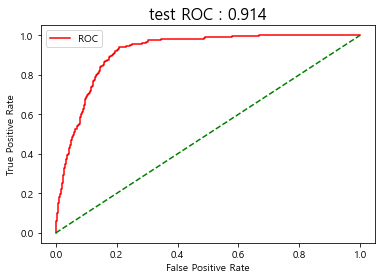

train_roc_auc score:  0.958765962525361
test_roc_auc score:  0.8051536865969856 

train_f1 score:  0.960050875874429
test_f1 score:  0.4141291108404384 

train_recall score:  0.9909297052154195
test_recall score:  0.7264957264957265 

train_pre score:  0.9310383494056963
test_pre score:  0.28960817717206133 

train acc score:  0.9587659625253611
test acc score:  0.8741825791263406 

---0.6193442344665527 seconds ---


In [70]:
import lightgbm
from lightgbm import LGBMClassifier
import os
import time
import warnings
warnings.filterwarnings('ignore')

start_time=time.time()

lgbm_clf = LGBMClassifier(random_state=0)

trained_model = lgbm_clf.fit(X_train_smt, y_train_smt)

train_pred = trained_model.predict(X_train_smt)
train_prob = trained_model.predict_proba(X_train_smt)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_smt, y_test, train_pred, test_pred, train_prob, test_prob)
# confusion_matrix(y_test, test_pred)
print("---%s seconds ---" % (time.time() - start_time))

## LightGBM GridSearch CV

In [71]:
# LGBMClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
        'learning_rate':[0.05, 0.1],\
        'num_iterations':[500, 1000],\
        'max_depth' : [5, 8, 10]\
        }

def best_lgbmparam(clf, param, scoring_name, cv_num):
        start_time = time.time()
        b_params= []        
        grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
        grid_cv.fit(X_train_smt, y_train_smt)
        
        b_params.append(grid_cv.best_params_)
        
        print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
        print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
        best_est = grid_cv.best_estimator_
        
        # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
        predictions = best_est.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print('테스트 세트에서의 LGBMClassifier 정확도 : {0:.4f}'.format(accuracy))
        print('LGBMClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))
        
        return b_params

In [72]:
b_params = best_lgbmparam(lgbm_clf, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 8, 'num_iterations': 1000}

GridSearchCV 최고 정확도 :0.9554
테스트 세트에서의 LGBMClassifier 정확도 : 0.9100
LGBMClassifier GridSearchCV 수행 시간: 50.9 초


{'learning_rate': 0.1, 'max_depth': 8, 'num_iterations': 1000}

In [73]:
# 최적 하이퍼 파라미터 저장

learning_rate = 0
num_iterations = 0
max_depth = 0

for key, value in b_params[-1].items():
    if key == 'learning_rate':
        learning_rate = value
    if key == 'num_iterations':
        num_iterations = value
    else:
        max_depth = value

In [74]:
# 최적 하이퍼 파라미터 적용
lgbm_clf1 = LGBMClassifier(learning_rate=learning_rate, max_depth=max_depth, num_iterations=num_iterations)
lgbm_clf1.fit(X_train_smt, y_train_smt)
lgbm1_pred = lgbm_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, lgbm1_pred)))

예측 정확도: 0.9100


In [75]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [76]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, lgbm_clf1.predict_proba(X_test)[:, 1])

In [79]:
from sklearn.preprocessing import Binarizer

thresholds = [0.45, 0.05, 0.6, 0.7, 0.85]
pred_proba = lgbm_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.45
오차행렬
[[3349  240]
 [ 112  122]]
정확도: 0.9079, 정밀도: 0.3370, 재현율: 0.5214, F1:0.4094, AUC:0.8992
임곗값: 0.05
오차행렬
[[3145  444]
 [  62  172]]
정확도: 0.8676, 정밀도: 0.2792, 재현율: 0.7350, F1:0.4047, AUC:0.8992
임곗값: 0.6
오차행렬
[[3381  208]
 [ 119  115]]
정확도: 0.9145, 정밀도: 0.3560, 재현율: 0.4915, F1:0.4129, AUC:0.8992
임곗값: 0.7
오차행렬
[[3406  183]
 [ 125  109]]
정확도: 0.9194, 정밀도: 0.3733, 재현율: 0.4658, F1:0.4144, AUC:0.8992
임곗값: 0.85
오차행렬
[[3452  137]
 [ 139   95]]
정확도: 0.9278, 정밀도: 0.4095, 재현율: 0.4060, F1:0.4077, AUC:0.8992


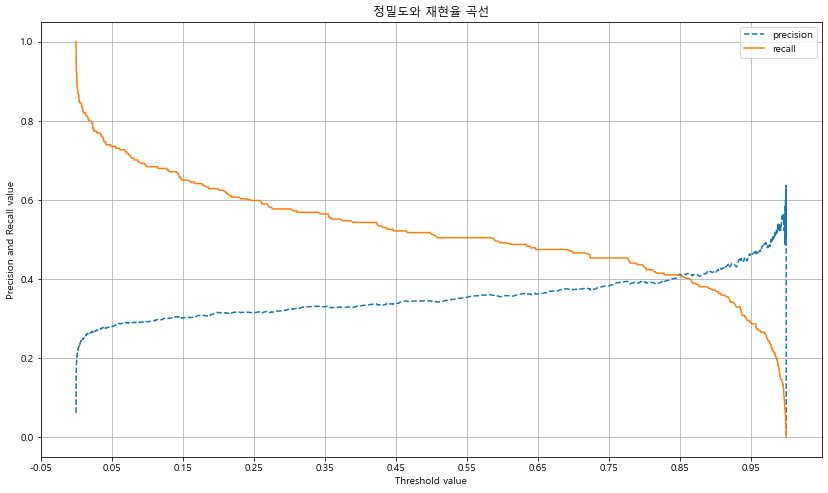

In [78]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [80]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lgbm_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

In [81]:
from sklearn.metrics import roc_auc_score

pred_proba = lgbm_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8992


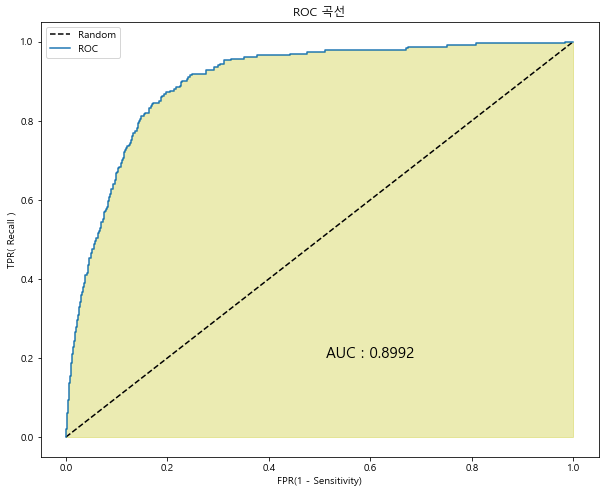

In [82]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## XGB Classifier

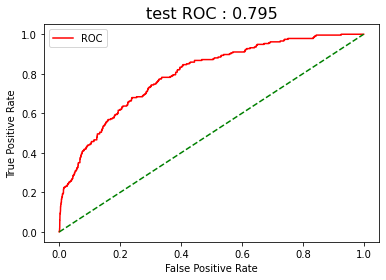

train_roc_auc score:  1.0
test_roc_auc score:  0.6553250316136914 

train_f1 score:  1.0
test_f1 score:  0.1631419939577039 

train_recall score:  1.0
test_recall score:  0.9230769230769231 

train_pre score:  1.0
test_pre score:  0.08947804473902236 

train acc score:  1.0
test acc score:  0.4203505100706252 



In [ ]:
from xgboost import XGBClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
xgb_clf_time = time.time()

xgb_clf = XGBClassifier(random_state=0)

trained_model = xgb_clf.fit(X_train, y_train,)

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, y_test, train_pred, test_pred, train_prob, test_prob)

## XGB Classifier GridSearch CV

In [ ]:
# LGBMTreeClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
        'learning_rate':[0.05, 0.1],\
        'n_estimators':[500, 1000],\
        'max_depth' : [5, 8, 10]\
        }

def best_xgbparam(clf, param, scoring_name, cv_num):
        start_time = time.time()
        b_params= []        
        grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
        grid_cv.fit(X_train, y_train)
        
        b_params.append(grid_cv.best_params_)
        
        print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
        print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
        best_est = grid_cv.best_estimator_
        
        # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
        predictions = best_est.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print('테스트 세트에서의 XGBClassifier 정확도 : {0:.4f}'.format(accuracy))
        print('XGBClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))
        
        return b_params

In [ ]:
b_params = best_xgbparam(xgb_clf, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 1000}

GridSearchCV 최고 정확도 :0.8948
테스트 세트에서의 XGBClassifier 정확도 : 0.4224
XGBClassifier GridSearchCV 수행 시간: 188.0 초


{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 1000}

In [ ]:
# 최적 하이퍼 파라미터 저장

learning_rate = 0
n_estimators = 0
max_depth = 0

for key, value in b_params[-1].items():
    if key == 'learning_rate':
        learning_rate = value
    if key == 'num_iterations':
        n_estimators = value
    else:
        max_depth = value

In [ ]:
# 최적 하이퍼 파라미터 적용
xgb_clf1 = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
xgb_clf1.fit(X_train, y_train)
xgb_clf1_pred = xgb_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_clf1_pred)))

예측 정확도: 0.9388


In [ ]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, xgb_clf1.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.preprocessing import Binarizer

thresholds = [0.01, 0.05, 0.1, 0.2]
pred_proba = xgb_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.01
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000
임곗값: 0.05
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000
임곗값: 0.1
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000
임곗값: 0.2
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000


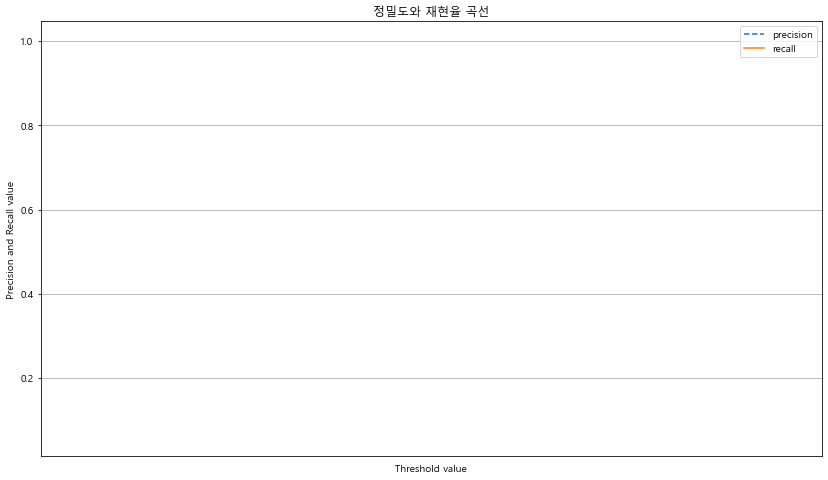

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, xgb_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = xgb_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [0.5]
샘플 임곗값별 FPR:  [1.]
샘플 임곗값별 TPR:  [1.]


In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba = xgb_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.5000


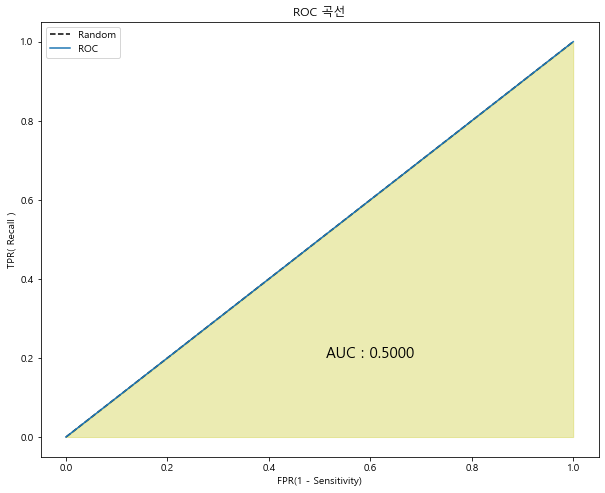

In [ ]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## KNN

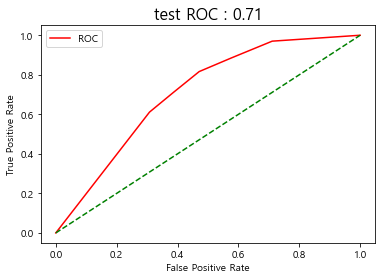

train_roc_auc score:  0.8795411089866156
test_roc_auc score:  0.6725387163531493 

train_f1 score:  0.8684759916492694
test_f1 score:  0.18052930056710773 

train_recall score:  0.7954110898661568
test_recall score:  0.8162393162393162 

train_pre score:  0.9563218390804598
test_pre score:  0.10148777895855472 

train acc score:  0.8795411089866156
test acc score:  0.5464295056238556 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# KNeighborsClassifier 학습/예측/평가
knn_clf_time = time.time()

knn_clf = KNeighborsClassifier()

trained_model = knn_clf.fit(X_train, y_train)

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, y_test, train_pred, test_pred, train_prob, test_prob)

## KNN Classifier GridSearch CV

In [ ]:
# LGBMTreeClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
        'learning_rate':[0.05, 0.1],\
        'n_estimators':[500, 1000],\
        'max_depth' : [5, 8, 10]\
        }

def best_knparam(clf, param, scoring_name, cv_num):
        start_time = time.time()
        b_params= []        
        grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
        grid_cv.fit(X_train, y_train)
        
        b_params.append(grid_cv.best_params_)
        
        print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
        print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
        best_est = grid_cv.best_estimator_
        
        # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
        predictions = best_est.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print('테스트 세트에서의 KNClassifier 정확도 : {0:.4f}'.format(accuracy))
        print('KNClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))
        
        return b_params

In [ ]:
b_params = best_knparam(knn_clf, parameters, 'accuracy', 5)
b_params[-1]

ValueError: Invalid parameter 'learning_rate' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

In [ ]:
# 최적 하이퍼 파라미터 저장

learning_rate = 0
n_estimators = 0
max_depth = 0

for key, value in b_params[-1].items():
    if key == 'learning_rate':
        learning_rate = value
    if key == 'num_iterations':
        n_estimators = value
    else:
        max_depth = value

In [ ]:
# 최적 하이퍼 파라미터 적용
knn_clf1 = KNeighborsClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
knn_clf1.fit(X_train, y_train)
knn1_pred = knn_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, knn1_pred)))

예측 정확도: 0.9388


In [ ]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, knn_clf1.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.preprocessing import Binarizer

thresholds = [0.01, 0.05, 0.1, 0.2]
pred_proba = knn_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.01
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000
임곗값: 0.05
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000
임곗값: 0.1
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000
임곗값: 0.2
오차행렬
[[   0 3589]
 [   0  234]]
정확도: 0.0612, 정밀도: 0.0612, 재현율: 1.0000, F1:0.1154, AUC:0.5000


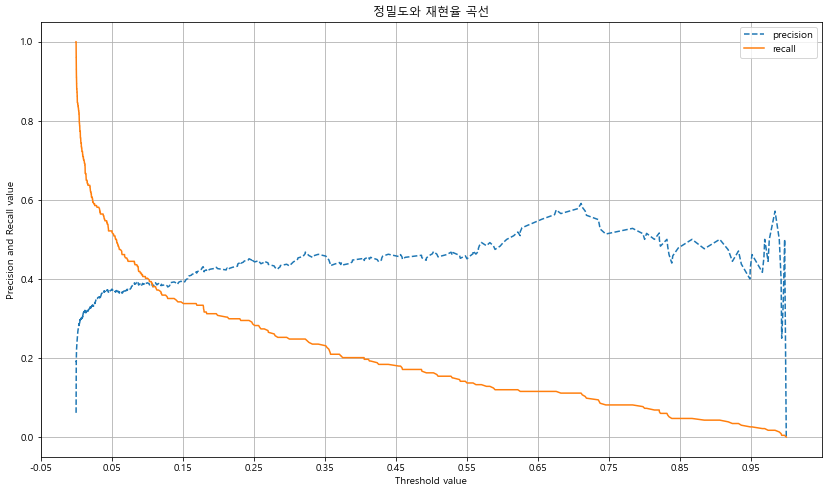

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, knn_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = knn_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [0.5]
샘플 임곗값별 FPR:  [1.]
샘플 임곗값별 TPR:  [1.]


In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba = knn_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.5000


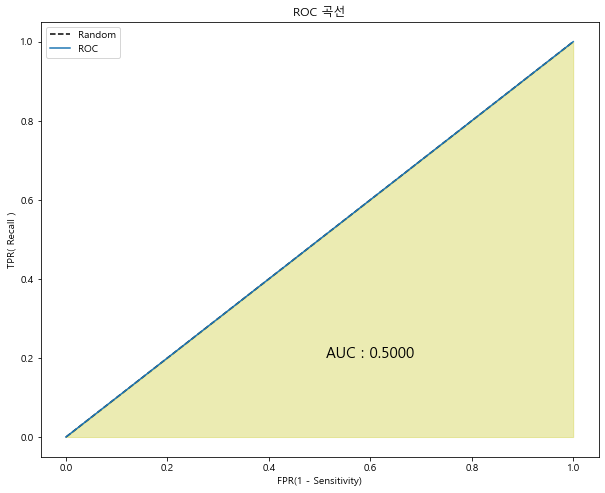

In [ ]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

## GaussianNB

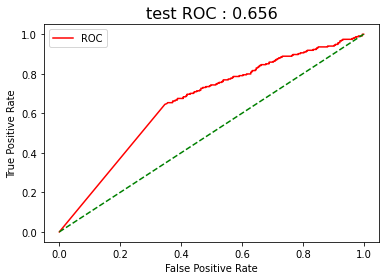

train_roc_auc score:  0.8833652007648184
test_roc_auc score:  0.5880200184323896 

train_f1 score:  0.8718487394957982
test_f1 score:  0.1405204460966543 

train_recall score:  0.7934990439770554
test_recall score:  0.8076923076923077 

train_pre score:  0.9673659673659674
test_pre score:  0.07695439739413681 

train acc score:  0.8833652007648184
test acc score:  0.3952393408318075 



In [ ]:
from sklearn.naive_bayes import GaussianNB
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
nb_clf_time = time.time()

nb_clf = GaussianNB()

trained_model = nb_clf.fit(X_train, y_train,)

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, y_test, train_pred, test_pred, train_prob, test_prob)

## SVC

In [ ]:
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
svc_clf_time = time.time()

svc_clf = SVC()

trained_model = svc_clf.fit(X_train, y_train,)

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, y_test, train_pred, test_pred, train_prob, test_prob)

AttributeError: predict_proba is not available when  probability=False

## Stacking Ensemble

In [83]:
# meta_data = np.array([lr1_pred, dt1_pred, rf1_pred, gb1_pred])
meta_data = np.array([lr1_pred, dt1_pred, rf1_pred, gb1_pred, lgbm1_pred])
meta_data.shape

(5, 3823)

In [84]:
meta_data = np.transpose(meta_data)
meta_data.shape

(3823, 5)

In [85]:
sens_model = LGBMClassifier(random_state=0)

sens_model.fit(meta_data, y_test)
sens_model_pred = sens_model.predict(meta_data)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, sens_model_pred)))

예측 정확도: 0.9388


## Stacking Ensemble GridSearch CV

In [87]:
# LGBMClassifier GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
        'learning_rate':[0.05, 0.1],\
        'num_iterations':[500, 1000],\
        'max_depth' : [5, 8, 10]\
        }

def best_sensparam(clf, param, scoring_name, cv_num):
        start_time = time.time()
        b_params= []        
        grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
        grid_cv.fit(X_train_smt, y_train_smt)
        
        b_params.append(grid_cv.best_params_)
        
        print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
        print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
        best_est = grid_cv.best_estimator_
        
        # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
        predictions = best_est.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print('테스트 세트에서의 LGBMClassifier 정확도 : {0:.4f}'.format(accuracy))
        print('LGBMClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))
        
        return b_params

In [88]:
b_params = best_sensparam(sens_model, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 8, 'num_iterations': 1000}

GridSearchCV 최고 정확도 :0.9554
테스트 세트에서의 LGBMClassifier 정확도 : 0.9100
LGBMClassifier GridSearchCV 수행 시간: 46.2 초


{'learning_rate': 0.1, 'max_depth': 8, 'num_iterations': 1000}

In [89]:
# 최적 하이퍼 파라미터 저장

max_depth = 0
min_samples_leaf = 0
min_samples_split = 0
n_estimators = 0

for key, value in b_params[-1].items():
    if key == 'max_depth':
        max_depth = value
    if key == 'min_samples_leaf':
        min_samples_leaf = value
    elif key == 'min_samples_split':
        min_samples_split = value
    else:
        n_estimators = value

In [90]:
# 최적 하이퍼 파라미터 적용
sens_model1 = LGBMClassifier(learning_rate=learning_rate, max_depth=max_depth, num_iterations=num_iterations)
sens_model1.fit(meta_data, y_test)
sens_model1_pred = sens_model1.predict(meta_data)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, sens_model1_pred)))

예측 정확도: 0.9388


In [91]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [92]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, sens_model1.predict_proba(meta_data)[:, 1])

In [95]:
from sklearn.preprocessing import Binarizer

thresholds = [0.05, 0.15, 0.2, 0.3, 0.4]
pred_proba = sens_model1.predict_proba(meta_data)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.05
오차행렬
[[2901  688]
 [  14  220]]
정확도: 0.8164, 정밀도: 0.2423, 재현율: 0.9402, F1:0.3853, AUC:0.9045
임곗값: 0.15
오차행렬
[[3046  543]
 [  24  210]]
정확도: 0.8517, 정밀도: 0.2789, 재현율: 0.8974, F1:0.4255, AUC:0.9045
임곗값: 0.2
오차행렬
[[3153  436]
 [  46  188]]
정확도: 0.8739, 정밀도: 0.3013, 재현율: 0.8034, F1:0.4382, AUC:0.9045
임곗값: 0.3
오차행렬
[[3396  193]
 [ 119  115]]
정확도: 0.9184, 정밀도: 0.3734, 재현율: 0.4915, F1:0.4244, AUC:0.9045
임곗값: 0.4
오차행렬
[[3586    3]
 [ 231    3]]
정확도: 0.9388, 정밀도: 0.5000, 재현율: 0.0128, F1:0.0250, AUC:0.9045


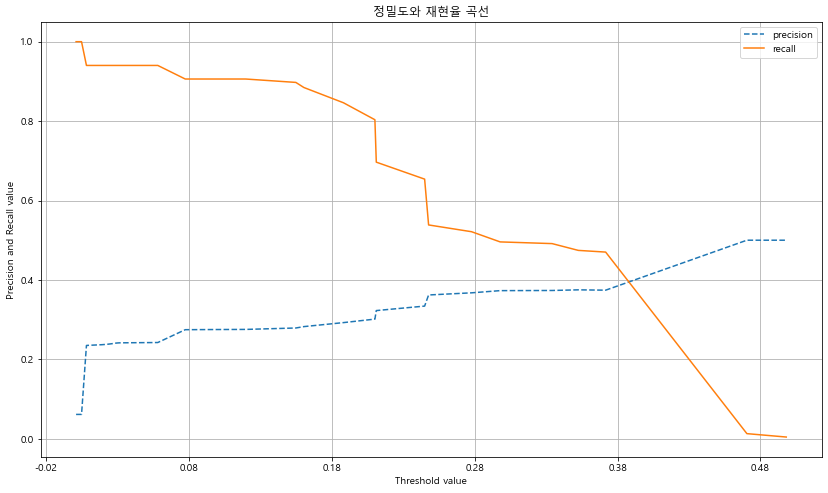

In [94]:
from sklearn.metrics import precision_recall_curve
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, sens_model1.predict_proba(meta_data)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

## ROC_AUC

In [96]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = sens_model1.predict_proba(meta_data)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]
샘플 index로 추출한 임곗값:  [0.5  0.47 0.37 0.35 0.33 0.3  0.28 0.25 0.24 0.21 0.21 0.19 0.16 0.15
 0.12 0.08 0.06 0.04 0.03 0.03 0.03 0.02 0.02 0.01 0.01 0.   0.  ]
샘플 임곗값별 FPR:  [0.    0.001 0.051 0.052 0.054 0.054 0.059 0.062 0.085 0.095 0.121 0.133
 0.147 0.151 0.155 0.156 0.192 0.192 0.193 0.194 0.195 0.196 0.198 0.199
 0.2   0.999 1.   ]
샘플 임곗값별 TPR:  [0.004 0.013 0.47  0.474 0.491 0.496 0.521 0.538 0.654 0.697 0.803 0.846
 0.885 0.897 0.906 0.906 0.94  0.94  0.94  0.94  0.94  0.94  0.94  0.94
 0.94  1.    1.   ]


In [97]:
from sklearn.metrics import roc_auc_score

pred_proba = sens_model1.predict_proba(meta_data)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.9045


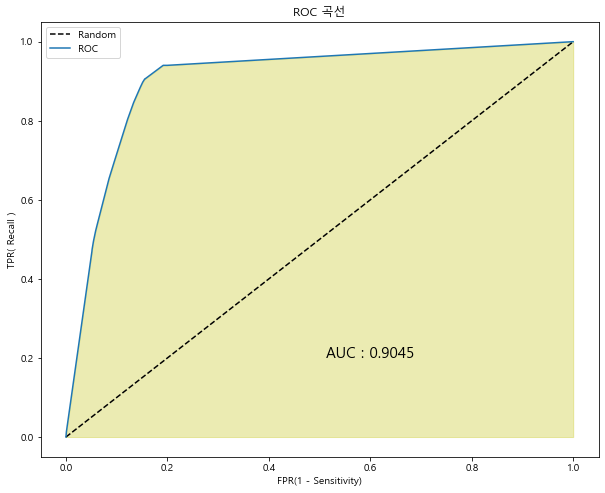

In [98]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()